# League of Legends Win Chance Prediction
### ML model to predict the outcome of a League of Legends match based on champion selection
https://github.com/4-en/LoL-Win-Prediction

## Introduction

League of Legends, often abbreviated as LoL, is a popular online multiplayer video game. It's a competitive 5 versus 5 team-based game in which players control unique champions with special abilities and work together to defeat the opposing team. The main objective is to destroy the enemy team's Nexus, a structure in their base, while defending your own. It combines elements of strategy, teamwork, and individual skill and is known for its strategic depth and fast-paced action. League of Legends is played by millions of players worldwide and has a thriving esports scene with professional leagues and tournaments.

In the competitive environment of League of Legends, players are always looking for ways to improve their chances of winning. Since it's a strategy game, one key element affecting a team's success is the mix of champions they pick. Our aim is to create a model that helps players make better decisions about champion selection and team composition by predicting the likelihood of each team winning based on their chosen champions. This also enables the most dedicated players to dodge an unfavorable matchup before the game begins in such a case where the prediction of their chances of winning are looking less than good.

The information about the match is limited to just the champions picked before the game actually begins, so we are going to be using only this information for training our model.


## Objectives

### Designing different models

First, we need to design the models that will be used to analyze the data and make predictions. Since the only information we have about a match before it starts are the selected champions (besides our own rank and history), our models will only take up to ten selected champions as input and try to predict the win chance of the game.

### Training the Models with Data

Next, we gather a comprehensive dataset that includes historical match data, including champion selections and the match outcomes. This dataset will be used to train the model, allowing it to learn the relationships between champion selections and match outcomes.

We will use different strategies during training and adapt hyperparameters as necessary.

### Evaluating Models

During and after the training process, we will compare the best models with each other using different measurements for performance. With this we will determine the best performing model and use it during the next steps.

### Using the Model to Predict Win Rates

Once the model is trained, it can be used to predict the win rate of a team in a specific match. By inputting the champion selections, the model can provide an estimate of the likelihood that one team will win over the other.

### Identifying the Champion with the Highest Win Rate

In addition to predicting team win rates, the model can be used to identify the champion with the highest win rate in a specific match. By analyzing the historical data and the champions selected in a particular match, the model can highlight the champion that statistically has the best track record for success in similar scenarios.


## Expected Results

It's important to understand that the model's predictions for team win chances are based on the factors included in the dataset used for training. While champion selection might be a significant factor, it's important to note that win chances in League of Legends depend on multiple other factors that the model does not take into account. These factors include things such as player skill, the element of randomness in the game, and various in-game decisions and actions.

The model's predictions are expected to be around 50%, which is a balanced estimation. In most cases, you shouldn't expect extreme predictions like 10% or 90%, as these would be rare and not reflective of the typical match outcome.

We hope to get to an accuracy of about 50 to 60%. Knowing that your expected win chance is around 60% can already help the player make more informed decisions during champion selection. Additionally, the model can pinpoint the champion with the best statistical chance of winning in a specific match, offering practical guidance for your team composition.

If the initial concept of the model doesn't yield satisfactory results, the dataset could be expanded to include more game-related data like player ranks and champion mastery. This could potentially lead to more accurate predictions.


## Similar Works

### LoL-Match-Prediction

[LoL-Match-Prediction](https://github.com/minihat/LoL-Match-Prediction)
Similar to our project, this project tries to predict the win chance of League of Legends matches. One of the key differences is, that the input has a lot more values than just the 10 champions we are using, including values that are only known during the game. This makes it a lot easier to predict the outcome, since there are less unknown factors that cannot be accounted for.

The architecture used in this project is a simple fully connected network with multiple layers. We will try something similar for our simpler models and then compare it with more complex architectures.

In some test, the model achieved accuracies of around 84%, which is much higher than we expect with our limited input data.

### Let's Predict League of Legends Match Score!

[Let's Predict League of Legends Match Score!](https://www.kaggle.com/code/gulsahdemiryurek/let-s-predict-league-of-legends-match-score)
This project uses Decision Trees to predict the outcome of games. Similar to the first example, this project also uses a lot more data than we have available. Although we won't use an architecture like this, it is impressive that they achieved an accuracy of ~97%.

Overall, there are a few examples of projects similar to ours, but they differ in a few aspects. Due to this, we will try our own ideas for different architectures and measure the performance to compare them.


## Dataset

There are several datasets available online that contain information about the outcome of the game, champions selected, player stats and much more. There is also the official Riot Games API available, which could be used to gather data from the latest version of the game.

For the purpose of this concept, we will be using a dataset from Kaggle. This gives us easy access to a lot of training data, without being limited by the API. While this means that the data is not up to date, it is still a good starting point for our model and useful for evaluating the concept.

The dataset [League of Legends- 1 day's worth of solo queue KR](https://www.kaggle.com/datasets/junhachoi/all-ranked-solo-games-on-kr-server-24-hours/) contains information about all ranked matches on the League of Legends Korean Server during the course of 1 day (GMT 2022/07/02 00:00:00 to 2022/07/03 00:00:00). In total, this amounts to over 250.000 matches. The advantage this dataset has over other datasets is that it is very large and one of the most recent ones available. The data is also from a single day, which means that the game version is the same for all matches. This is important because the game is constantly being updated and the balance of champions changes with every patch. This means that the data from older patches is not as useful for training our model.

### Data cleaning

We will try to clean and improve the dataset by removing some outliers that could negatively impact training. The data cleaning will only be applied to the training data, so we can determine if it had a positive impact. We will also compare the cleaned data with uncleaned data to decide which method is better.

The dataset contains multiple values that could be helpful to filter the games. In general, we want to remove games in which the champion selection had a lower impact than usual. We are doing this by finding games that were already uneven from the beginning, since this could indicate that the players' skill level was further apart than normal or that something else that had nothing to do with the champions effected the game, like a player disconnection or not participating.

There is a risk that filtering the games in this way will create some form of bias, especially against champions that are stronger in the early stages of the game. We will have to measure how this cleaning effects the performance of our models and adjust the thresholds for filtering games if necessary.

The keys we are using to filter games are the following:

-   gameEndedInEarlySurrender
    -   This flag indicates whether one team surrendered early.
-   timePlayed
    -   We are filtering games that are shorter than 20min, since these games were probably very uneven.
-   champLevel
    -   We are filtering games were one or more champions are far below the average, indicating that they were not participating.


In [1]:
# NOTE: to run this project, you need to download the complete repository, 
# since it includes the dataset and other .py files that are used in here
# URL: https://github.com/4-en/LoL-Win-Prediction

# if false, preprocessed data will be loaded from disk
# same results, but faster
CONVERT_DATA = False
import numpy as np
train, train_filtered, val, test = None, None, None, None

if CONVERT_DATA:
    # load data used for training
    import data.kr_24h.convert as convert

    # load the data, including stats we dont need
    games_dict = convert.load_raw_csv(file_path="data/kr_24h/kr_soloq_24h/sat df.csv")
    games = list(games_dict.values())

    # shuffle games
    np.random.shuffle(games)

    # split into train, val, test
    train, val, test = convert.split_iterable(games, weights=(90, 5, 5))
    print("train: ", len(train))
    print("val: ", len(val))
    print("test: ", len(test))
    print()

    # convert each match into a list of 10 champions and a 1/0 for win/loss of blue team
    # two copies of train data, one with some matches filtered out
    train, train_filtered = convert.convert_data(train, filter_matches=False), convert.convert_data(train, filter_matches=True)
    val = convert.convert_data(val, filter_matches=False)
    test = convert.convert_data(test, filter_matches=False)

In [2]:
# for some reason, this takes like 20min to run in the notebook, but only 1min directly in python

# to save some time, we saved the data to a file and load it here, but you can also just run the above code if you have time
# the result is the same
import numpy as np
dir = "data/notebook/"


if not CONVERT_DATA:
    # load the data
    train = np.load(dir + "train.npy")
    train_filtered = np.load(dir + "train_filtered.npy")
    val = np.load(dir + "val.npy")
    test = np.load(dir + "test.npy")

    # print lengths
    print("train: ", len(train))
    print("train_filtered: ", len(train_filtered))
    print("val: ", len(val))
    print("test: ", len(test))

train:  233040
train_filtered:  204704
val:  12947
test:  12947


In [ ]:
# split into x and y
train_x, train_y = train[:, :-1], train[:, -1]
train_filtered_x, train_filtered_y = train_filtered[:, :-1], train_filtered[:, -1]
val_x, val_y = val[:, :-1], val[:, -1]
test_x, test_y = test[:, :-1], test[:, -1]

# convert y to float and to correct shape
def conv_y(y):
    y = y.astype(float)
    y = y.reshape(-1, 1)
    return y

train_y, train_filtered_y = conv_y(train_y), conv_y(train_filtered_y)
val_y, test_y = conv_y(val_y), conv_y(test_y)


# convert champion ids to indices and then one-hot encode
from champion_dicts import ChampionConverter

# see champion_dicts.py for more info
# we have to convert the champion ids from the data into indices, since the ids are not contiguous
# (some ids are 500+, but there are less than 170 champions)
champ_converter = ChampionConverter()

def conv_x(x):
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = champ_converter.get_champion_index_from_id(x[i, j])
    return x

train_x, train_filtered_x = conv_x(train_x), conv_x(train_filtered_x)
val_x, test_x = conv_x(val_x), conv_x(test_x)


import numpy as np

# one-hot encode the champions, used by simple models
CHAMP_NUM = 170 # number of champions, actually a bit less, but this way we could keep same model for more champions
def one_hot_encode(x):
    one_hot = np.zeros((x.shape[0], x.shape[1], CHAMP_NUM))
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            one_hot[i,j,int(x[i,j]-1)] = 1
    return one_hot

train_x_1hot = one_hot_encode(train_x)
train_filtered_x_1hot = one_hot_encode(train_filtered_x)
val_x_1hot = one_hot_encode(val_x)
test_x_1hot = one_hot_encode(test_x)

## Data Analysis

Before we can start training our model, we need to do some data analysis to get a better understanding of the data. This will help us decide which features to use and how to process them. It can also help us with evaluating the performance of our models later on.

### Overall Win Rate

The first thing we want to look at is the overall win rate (of the blue side). Since the game is not symmetrical, we can't assume that the win rate is 50%. In fact, during most patches, the blue side (bottom left) has a slightly higher win rate than the red side. This can be explained by several factors, such as the camera angle, the position of the minimap, and the position of the HUD. The blue side also has a slight advantage in champion select, since they get to pick first.

This overall win rate gives us a baseline for our model. If our model is not able to beat this baseline, then it is not very useful. The overall win rate is calculated by dividing the number of wins by the total number of matches.


In [88]:
# calculate average win chance, we should at least beat this :)
avg_win_chance = np.average(train_y)
print("average blue side win chance: ", avg_win_chance)

average blue side win chance:  0.5176064194987985


### Champion Win Rate

Next, we want to look at the win rate of each champion. This gives us an idea of how strong each champion is and how likely they are to win. We can also see which champions are the most popular and which ones are the least popular. With this, we can evaluate the performance of our model and see if it is able to predict the outcome of the game better than just picking the most popular champions. If we match champions with high win rates against champions with low win rates, we can also see if our models are able to predict the outcome of the game correctly.


In [94]:
total_wins = {champion_id: 0 for champion_id in range(1, CHAMP_NUM + 1)}
total_losses = {champion_id: 0 for champion_id in range(1, CHAMP_NUM + 1)}


for i in range(train_x.shape[0]):
    for j in range(train_x.shape[1]):
        champion_id = int(train_x[i, j])
        if train_y[i] == 1:
            total_wins[champion_id] += 1
        else:
            total_losses[champion_id] += 1

average_winrates = {}
for champion_id in range(1, CHAMP_NUM + 1):
    total_games = total_wins[champion_id] + total_losses[champion_id]
    if total_games > 0:
        winrate = total_wins[champion_id] / total_games
        champion_name = champ_converter.get_champion_name_from_index(champion_id)
        pickrate = total_games / train_x.shape[0]
        average_winrates[champion_id] = {'name': champion_name, 'winrate': winrate, 'pickrate': pickrate}
    else:
        average_winrates[champion_id] = {'name': 'Unknown', 'winrate': 0.0, 'pickrate': 0}

champ_winrates = list(average_winrates.values())
champ_winrates.sort(key=lambda c: c["winrate"], reverse=True)

print("Top 10 winrates with pickrates:")
for i in range(10):
    champ = champ_winrates[i]
    wr = str(round(champ["winrate"]*100, ndigits=2))+"%"
    picks = str(round(champ["pickrate"]*100, ndigits=2))+"%"
    print(champ["name"]+ ": " + wr + " wr, " + picks + " pr")
    

Top 10 winrates with pickrates:
AurelionSol: 54.21% wr, 0.51% pr
Janna: 53.7% wr, 1.21% pr
Rumble: 53.6% wr, 3.4% pr
Urgot: 53.09% wr, 1.17% pr
Aatrox: 52.75% wr, 6.22% pr
RekSai: 52.71% wr, 2.43% pr
Fiddlesticks: 52.69% wr, 2.36% pr
Vex: 52.68% wr, 4.11% pr
Vladimir: 52.64% wr, 4.29% pr
Pyke: 52.58% wr, 8.42% pr


The champion with the highest win rate is Aurelion Sol, with 54.21%. At the same time, he also has a relatively low pick rate, being only in 0.51% of all games. The other champions are already a bit lower, with the number 10 spot having only 52.58% win rate. This tells us that the champions are all relatively balances and that we can't expect too high accuracies with our models. Although we also want the model to learn the interactions between champions and not just the average win rate, which could lead to improvements in some cases, it is unlikely that the average prediction will be much more accurate than just the average win rate.

## Basic Models
First, we will start to train and compare some basic models, to give us an idea of our initial performance. The trivial model below is not trainable, it just predicts the average win rate for every input. We will use it as the bare minimum, as a model that can't outperform this will be of no use.

The second model is just a fully connected model with 4 layers of different sizes, although the first layer processes each champion vector on its own before flattening the entire state.
We will train this model to see if it can outperform the previous one and then try to improve its performance with hyperparameter or architecture adjustments.

In [6]:
import tensorflow as tf

import stats # for printing and plotting model performance



class TrivialModel(tf.keras.Model):
    """A trivial model that always predicts the average win chance"""
    def __init__(self):
        super(TrivialModel, self).__init__()
        self.prediction = avg_win_chance

    def call(self, inputs):
        batch_size = 1
        if len(inputs.shape) > 1:
            if inputs.shape[0] != None:
                batch_size = inputs.shape[0]
        t = tf.constant(self.prediction, shape=(batch_size, 1))
        return t


# baseline model, just some dense layers
class BaselineModel(tf.keras.Model):
    def __init__(self):
        super(BaselineModel, self).__init__()
        self.dense1 = tf.keras.layers.Dense(32, activation='relu', input_shape=(None,CHAMP_NUM))
        self.dense2 = tf.keras.layers.Dense(256, activation='relu')
        self.dense4 = tf.keras.layers.Dense(128, activation='relu')
        self.dense5 = tf.keras.layers.Dense(1, activation='sigmoid')

    def call(self, inputs):
        x = tf.reshape(inputs, (-1, 10, CHAMP_NUM))
        # same dense for every player
        x = self.dense1(x)
        # shape = (-1, 10, 32  )
        # flatten
        x = tf.reshape(x, (-1, 32*10))
        # 3 dense layers, last one is output of (-1, 1)
        x = self.dense2(x)
        x = self.dense4(x)
        return self.dense5(x)

Epoch 1/10
911/911 [==============================] - 2s 2ms/step - loss: 0.6925 - accuracy: 0.5176 - val_loss: 0.6933 - val_accuracy: 0.5072
Epoch 2/10
911/911 [==============================] - 1s 2ms/step - loss: 0.6925 - accuracy: 0.5176 - val_loss: 0.6933 - val_accuracy: 0.5072
Epoch 3/10
911/911 [==============================] - 1s 2ms/step - loss: 0.6925 - accuracy: 0.5176 - val_loss: 0.6933 - val_accuracy: 0.5072
Epoch 4/10
911/911 [==============================] - 1s 2ms/step - loss: 0.6925 - accuracy: 0.5176 - val_loss: 0.6933 - val_accuracy: 0.5072
Epoch 5/10
911/911 [==============================] - 1s 2ms/step - loss: 0.6925 - accuracy: 0.5176 - val_loss: 0.6933 - val_accuracy: 0.5072
Epoch 6/10
911/911 [==============================] - 1s 2ms/step - loss: 0.6925 - accuracy: 0.5176 - val_loss: 0.6933 - val_accuracy: 0.5072
Epoch 7/10
911/911 [==============================] - 1s 2ms/step - loss: 0.6925 - accuracy: 0.5176 - val_loss: 0.6933 - val_accuracy: 0.5072
Epoch 

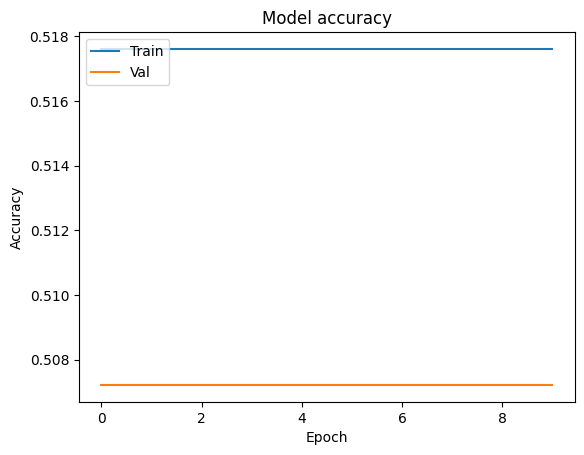

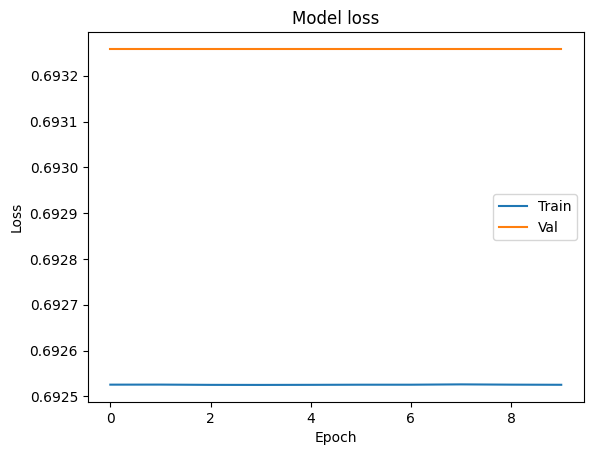

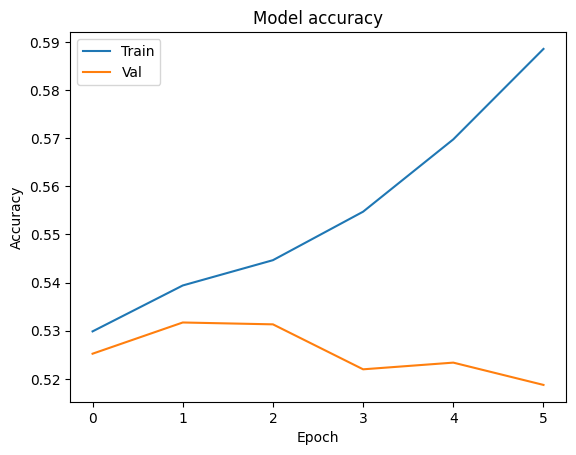

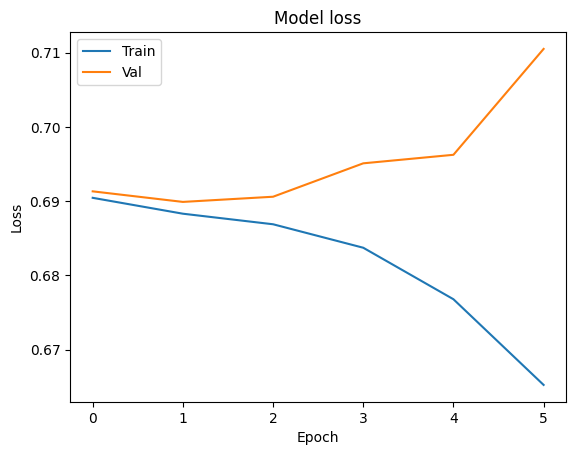

In [7]:
# trivial model for comparison
trivial_model = TrivialModel()
trivial_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# this model is not trainable, but we can still fit it to get the history for plotting
trivial_hist = trivial_model.fit(train_x_1hot, train_y, epochs=10, batch_size=256, validation_data=(val_x_1hot, val_y))

# train baseline model

base_model = BaselineModel()
base_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

base_hist = base_model.fit(train_x_1hot, train_y, epochs=6, batch_size=32, validation_data=(val_x_1hot, val_y))

# plot the results
stats.plot_history(trivial_hist)
stats.plot_history(base_hist)

As we can see, the baseline model does manage to get a higher accuracy than the average win rate. The validation accuracy starts going down really quickly, while the training accuracy keeps going up. This indicates that the model is overfitting to the training data. This is not surprising, since the model is very simple and the training data is very large. We will have to use a more complex model and try to use some regularization to prevent overfitting.


## Cleaned Data

Now we are going to check if using the cleaned data improves the performance of the model. To do that, we are simply going to train the model with the cleaned data and use the same val data as before. We will then compare the results to see if there is any improvement.


Epoch 1/6
6397/6397 [==============================] - 15s 2ms/step - loss: 0.6906 - accuracy: 0.5298 - val_loss: 0.6906 - val_accuracy: 0.5283
Epoch 2/6
6397/6397 [==============================] - 14s 2ms/step - loss: 0.6882 - accuracy: 0.5409 - val_loss: 0.6910 - val_accuracy: 0.5324
Epoch 3/6
6397/6397 [==============================] - 14s 2ms/step - loss: 0.6869 - accuracy: 0.5441 - val_loss: 0.6917 - val_accuracy: 0.5318
Epoch 4/6
6397/6397 [==============================] - 14s 2ms/step - loss: 0.6837 - accuracy: 0.5551 - val_loss: 0.6921 - val_accuracy: 0.5285
Epoch 5/6
6397/6397 [==============================] - 14s 2ms/step - loss: 0.6763 - accuracy: 0.5719 - val_loss: 0.6967 - val_accuracy: 0.5210
Epoch 6/6
6397/6397 [==============================] - 14s 2ms/step - loss: 0.6630 - accuracy: 0.5946 - val_loss: 0.7158 - val_accuracy: 0.5062


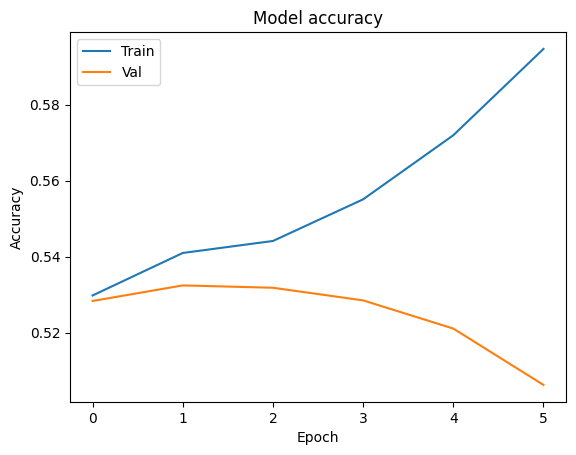

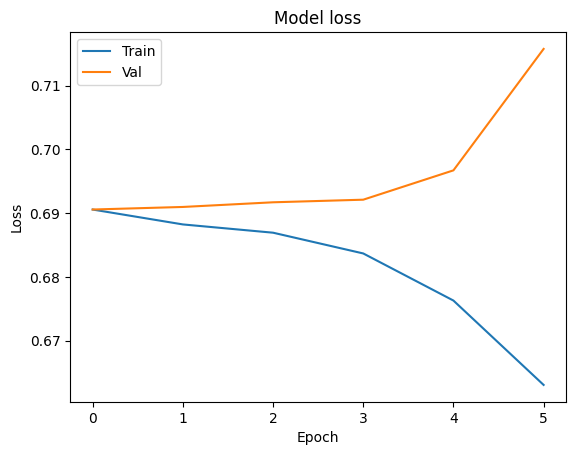

In [8]:
# same model, but with some matches filtered out
base_model_filtered = BaselineModel()
base_model_filtered.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

bmf_hist = base_model_filtered.fit(train_filtered_x_1hot, train_filtered_y, epochs=6, batch_size=32, validation_data=(val_x_1hot, val_y))

# plot the results
stats.plot_history(bmf_hist)

We can see that our validation accuracy is slightly higher at almost 0.54 and that the overfitting is a bit weaker, although it is still quite a lot. We can also observe, that the training accuracy is increasing faster than before. This is probably due to the fact that the filtered data contains less noise, so fewer games that are not as dependent on the champions as the average, which means that it is easier to learn the impact of each champion.


## Embeddings

Instead of using one-hot encoded vectors, we want to use an embedding layer. This is not only more convenient and easier to work with, it could also help to improve the models' performance as well as the training speed.

After the embedding layer, this model should be the same as the Baseline model, so we expect similar performance.


In [9]:
# a basic model that uses embeddings at the first layer instead of one hot vectors
class BasicEmbedding(tf.keras.Model):
    def __init__(self, champ_num=170, embed_dim=32):
        super(BasicEmbedding, self).__init__()
        self.champ_num = champ_num
        self.embed_dim = embed_dim
        player_num = 10
        self.embedding = tf.keras.layers.Embedding(champ_num, embed_dim, input_length=player_num)
        self.flatten = tf.keras.layers.Flatten()
        
        self.dense2 = tf.keras.layers.Dense(256, activation='relu')
        self.dense4 = tf.keras.layers.Dense(128, activation='relu')
        self.dense5 = tf.keras.layers.Dense(1, activation='sigmoid')


    def call(self, inputs):
        x = self.embedding(inputs)
        x = self.flatten(x)
        x = self.dense2(x)
        x = self.dense4(x)
        return self.dense5(x)

Epoch 1/6


6397/6397 [==============================] - 19s 3ms/step - loss: 0.6904 - accuracy: 0.5292 - val_loss: 0.6905 - val_accuracy: 0.5280
Epoch 2/6
6397/6397 [==============================] - 17s 3ms/step - loss: 0.6885 - accuracy: 0.5393 - val_loss: 0.6906 - val_accuracy: 0.5281
Epoch 3/6
6397/6397 [==============================] - 17s 3ms/step - loss: 0.6871 - accuracy: 0.5434 - val_loss: 0.6910 - val_accuracy: 0.5307
Epoch 4/6
6397/6397 [==============================] - 17s 3ms/step - loss: 0.6846 - accuracy: 0.5521 - val_loss: 0.6930 - val_accuracy: 0.5319
Epoch 5/6
6397/6397 [==============================] - 17s 3ms/step - loss: 0.6788 - accuracy: 0.5651 - val_loss: 0.6955 - val_accuracy: 0.5311
Epoch 6/6
6397/6397 [==============================] - 17s 3ms/step - loss: 0.6681 - accuracy: 0.5840 - val_loss: 0.7040 - val_accuracy: 0.5231


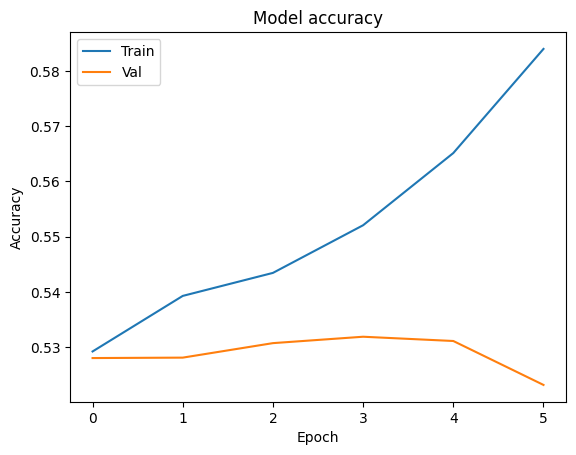

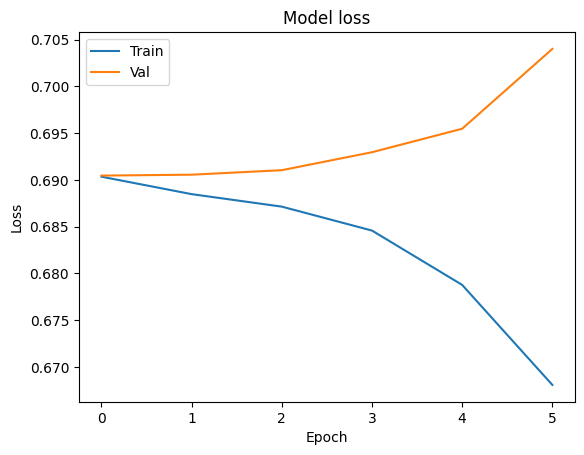

In [10]:
basic_embedding = BasicEmbedding()
basic_embedding.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

be_hist = basic_embedding.fit(train_filtered_x, train_filtered_y, epochs=6, batch_size=32, validation_data=(val_x, val_y))

# plot the results
stats.plot_history(be_hist)

We can see that this model is quite similar to the baseline version. We still have the overfitting problem and get a validation accuracy of slightly below 0.54. In the next step, we will try to use some data augmentation to improve the performance of our model and reduce overfitting.


## Data Augmentation

To reduce overfitting, we are going to use some data augmentation. We will do this by randomly swapping the champions of the blue and red side. This will create new training data that is similar to the original data, but not exactly the same. This should help to reduce overfitting and improve the performance of our model.

Since one of our goals is to predict the win chance during champion select and calculate the optimal pick for a given state, we will also introduce masking to our input data, which will allow us to hide the champions that have not been picked yet. Since the order in which champions are selected is more or less random anyway, masking the selection and keeping the outcome of the game should still result in one of all possible combinations during champion select. If we do this often enough, the model hopefully learns how champions interact with each other and which champions are good against others.

Lastly, we will randomly replace some champions with a random champion. This is basically introducing some noise to the data, which should help to reduce overfitting and improve the performance of our model. In addition, this will effectively increase the size of our training data, which should also help to reduce overfitting.


Epoch 1/20
3198/3198 [==============================] - 13s 4ms/step - loss: 0.6918 - accuracy: 0.5220 - val_loss: 0.6905 - val_accuracy: 0.5285
Epoch 2/20
3198/3198 [==============================] - 11s 4ms/step - loss: 0.6910 - accuracy: 0.5265 - val_loss: 0.6910 - val_accuracy: 0.5303
Epoch 3/20
3198/3198 [==============================] - 11s 3ms/step - loss: 0.6909 - accuracy: 0.5273 - val_loss: 0.6913 - val_accuracy: 0.5247
Epoch 4/20
3198/3198 [==============================] - 11s 4ms/step - loss: 0.6906 - accuracy: 0.5303 - val_loss: 0.6912 - val_accuracy: 0.5265
Epoch 5/20
3198/3198 [==============================] - 11s 4ms/step - loss: 0.6906 - accuracy: 0.5286 - val_loss: 0.6911 - val_accuracy: 0.5271
Epoch 6/20
3198/3198 [==============================] - 11s 3ms/step - loss: 0.6906 - accuracy: 0.5287 - val_loss: 0.6910 - val_accuracy: 0.5302
Epoch 7/20
3198/3198 [==============================] - 11s 4ms/step - loss: 0.6904 - accuracy: 0.5288 - val_loss: 0.6916 - val_ac

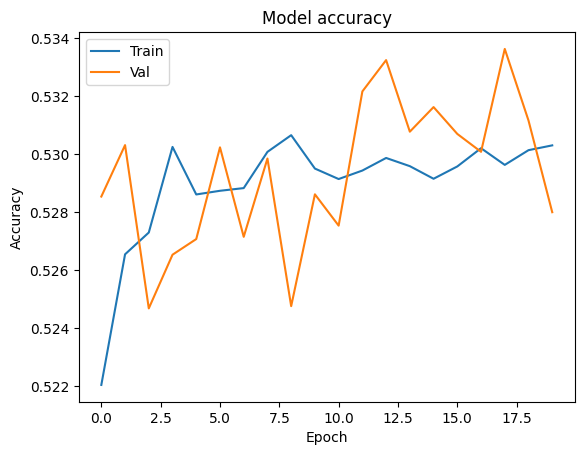

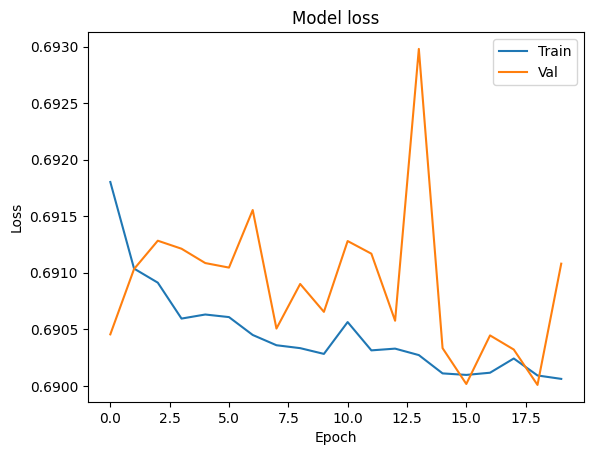

In [11]:

import augmentation # for data augmentation
# see augmentation.py for more info

# aug_chance is the chance that a match will be augmented
# max_replace is the maximum number of champions that can be replaced
# batch_size is the batch size used for training
aug = augmentation.MatchAugmentation(train_filtered_x, train_filtered_y, aug_chance=0.90, batch_size=64, max_replace=3)

aug_emb = BasicEmbedding()
aug_emb.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

aug_hist = aug_emb.fit(aug, epochs=20, validation_data=(val_x, val_y))

# plot the results
stats.plot_history(aug_hist)

These first test show that the augmentation prevents the model from overfitting. The accuracy is not higher than before, but we can see that it keeps improving even after 20 epochs, when it started going down before. This means that we could probably train the model for longer and get a higher accuracy, but the downside is that the training will take longer.

We will now try some other parameters for the augmentation and see if we can improve the performance of our model. It is possible that we introduced too much noise, which could be the reason why the accuracy is not higher than before.


Epoch 1/20
3198/3198 [==============================] - 11s 3ms/step - loss: 0.6918 - accuracy: 0.5212 - val_loss: 0.6911 - val_accuracy: 0.5275
Epoch 2/20
3198/3198 [==============================] - 11s 4ms/step - loss: 0.6909 - accuracy: 0.5273 - val_loss: 0.6908 - val_accuracy: 0.5278
Epoch 3/20
3198/3198 [==============================] - 11s 3ms/step - loss: 0.6905 - accuracy: 0.5286 - val_loss: 0.6906 - val_accuracy: 0.5265
Epoch 4/20
3198/3198 [==============================] - 11s 3ms/step - loss: 0.6904 - accuracy: 0.5295 - val_loss: 0.6916 - val_accuracy: 0.5279
Epoch 5/20
3198/3198 [==============================] - 11s 3ms/step - loss: 0.6901 - accuracy: 0.5300 - val_loss: 0.6910 - val_accuracy: 0.5265
Epoch 6/20
3198/3198 [==============================] - 11s 3ms/step - loss: 0.6899 - accuracy: 0.5312 - val_loss: 0.6903 - val_accuracy: 0.5312
Epoch 7/20
3198/3198 [==============================] - 11s 3ms/step - loss: 0.6901 - accuracy: 0.5319 - val_loss: 0.6905 - val_ac

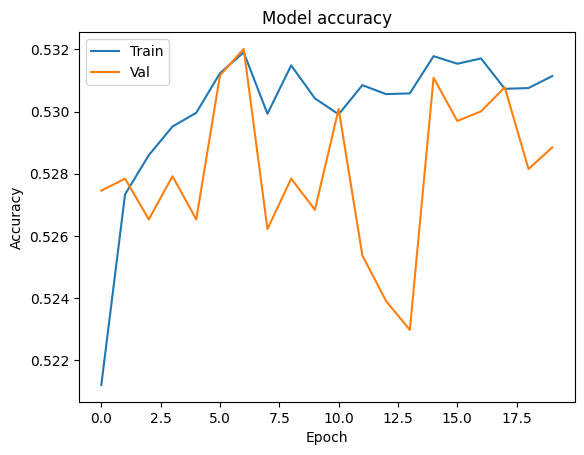

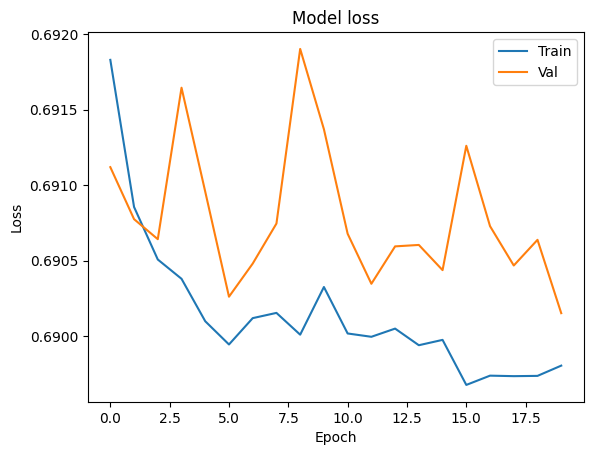

In [12]:

# lower chance of augmentation
# lower max_replace
aug2 = augmentation.MatchAugmentation(train_filtered_x, train_filtered_y, aug_chance=0.85, batch_size=64, max_replace=2)

aug_emb2 = BasicEmbedding()
aug_emb2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

aug_hist2 = aug_emb2.fit(aug2, epochs=20, validation_data=(val_x, val_y))

# plot the results
stats.plot_history(aug_hist2)

We tested a few different parameters, but it seemed like the best results were achieved with the following parameters:

-   aug_chance: 0.85
-   max_replace: 2
-   batch_size: 64

This does not necessarily mean that these are also the best parameters for different models, but we will use them as default values for now and see if we can improve then later.


Evaluating  Avg chance
  1/405 [..............................] - ETA: 25s - loss: 0.6938 - accuracy: 0.5000

405/405 [==============================] - 1s 1ms/step - loss: 0.6926 - accuracy: 0.5173
Test accuracy:  0.6925509572029114
Test loss:  0.5172626972198486
Evaluating  Basic Emb.
405/405 [==============================] - 1s 2ms/step - loss: 0.7082 - accuracy: 0.5174
Test accuracy:  0.7081529498100281
Test loss:  0.5174171328544617
Evaluating  Augm. Emb.
405/405 [==============================] - 1s 2ms/step - loss: 0.6898 - accuracy: 0.5313
Test accuracy:  0.6898033618927002
Test loss:  0.5313199758529663


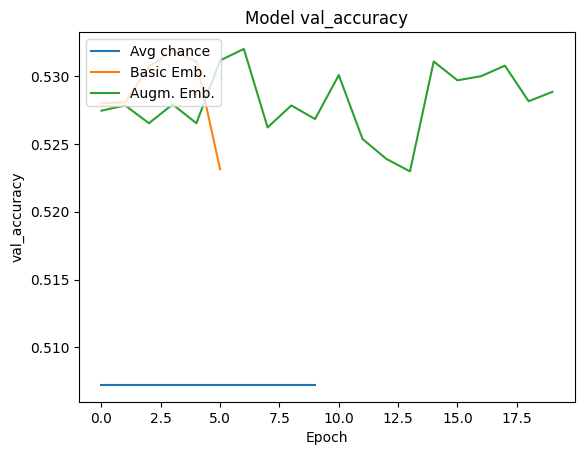

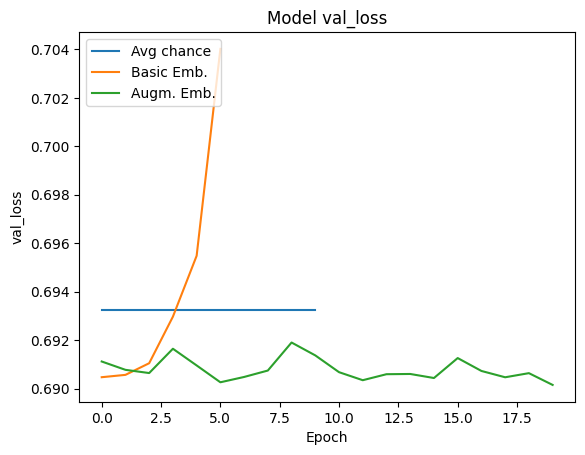

In [13]:
import stats
# this module has a few functions and classes that make plotting and comparing performance easier
# see stats.py for more details

comparator = stats.ModelComparator((test_x, test_y))

comparator.add_model(trivial_model, trivial_hist, "Avg chance")
comparator.add_model(basic_embedding, be_hist, "Basic Emb.")
comparator.add_model(aug_emb2, aug_hist2, "Augm. Emb.")

comparator.plot_histories()

In the graphs above, we can see how the embedding model with augmentation performs clearly the best and does not suffer from overfitting. In the next steps we will try to create more complex models and hopefully improve the performance further.


## Different Architectures

In this section, we will try to use different architectures and measure their performance.

The first one is still similar to the BasicEmbedding model, since it starts with an embedding layers followed by a few dense layers. The difference hear is the number of layers, which, depending on the parameters, will be a lot higher, and the residual connections to make training this deeper model easier.

We will also adjust the learning parameters and try out which of them work the best.


In [14]:
# training parameters
aug = augmentation.MatchAugmentation(train_filtered_x, train_filtered_y, aug_chance=0.90, batch_size=64, max_replace=2)

# adapts learning rate and batch size based on epoch
def create_scheduler(lr_f, bs_f, min_lr=1e-10, max_lr=1e-3, min_bs=4, max_bs=256, aug=aug):
    def schedul_f(epoch):
      bs = bs_f(epoch)
      bs = max(bs, min_bs)
      bs = min(bs, max_bs)

      # adjust batch size in augmentor
      # doesnt work yet :(
      #aug.batch_size = bs

      lr = lr_f(epoch)
      lr = max(lr, min_lr)
      lr = min(lr, max_lr)

      return lr

    scheduler = tf.keras.callbacks.LearningRateScheduler(schedul_f)
    return scheduler


In [15]:
# Deep Embedding

# a deep embedding model with multiple layers consisting of dense layers and residual connections and layer norm
class DeepEmbedding(tf.keras.Model):
    def __init__(self, champ_num=170, embed_dim=32, n_layers=4, layer_size=3):
        super(DeepEmbedding, self).__init__()
        self.champ_num = champ_num
        self.embed_dim = embed_dim
        self.n_layers=n_layers
        self.layer_size=layer_size
        player_num = 10
        self.embedding = tf.keras.layers.Embedding(champ_num, embed_dim)
        self.flatten = tf.keras.layers.Flatten()
        self.layer_norm = tf.keras.layers.LayerNormalization()


        self.deep_layers = []
        for _ in range(n_layers):
            l = []
            for _ in range(layer_size):
                l.append(
                    tf.keras.layers.Dense(player_num*embed_dim, activation='gelu')
                )
            self.deep_layers.append(l)

            

        self.dense_output1 = tf.keras.layers.Dense(embed_dim*5, activation='gelu')
        self.dense_output2 = tf.keras.layers.Dense(embed_dim*2, activation='gelu')
        self.dense_output3 = tf.keras.layers.Dense(1, activation='sigmoid')


    def call(self, inputs):
        x0 = self.embedding(inputs)
        x0 = self.flatten(x0)

        for i in range(self.n_layers):
            x = self.deep_layers[i][0](x0)
            for j in range(1, self.layer_size):
                x = self.deep_layers[i][j](x)
                
            x += x0
            x0 = self.layer_norm(x)
        
        x = self.dense_output1(x0)
        x = self.dense_output2(x)
        return self.dense_output3(x)

In [16]:

deep_emb_model = DeepEmbedding(n_layers=4, layer_size=3)
deep_emb_model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

scheduler = create_scheduler(lambda epoch: 0.0001 * 0.97**epoch, lambda epoch: 8*(2**(epoch//5)))
deep_emb_hist = deep_emb_model.fit(aug, epochs=10, validation_data=(val_x, val_y), callbacks=[scheduler])

Epoch 1/10
3198/3198 [==============================] - 32s 9ms/step - loss: 0.6958 - accuracy: 0.5067 - val_loss: 0.6935 - val_accuracy: 0.5110 - lr: 1.0000e-04
Epoch 2/10
3198/3198 [==============================] - 28s 9ms/step - loss: 0.6927 - accuracy: 0.5131 - val_loss: 0.6918 - val_accuracy: 0.5227 - lr: 9.7000e-05
Epoch 3/10
3198/3198 [==============================] - 28s 9ms/step - loss: 0.6914 - accuracy: 0.5230 - val_loss: 0.6909 - val_accuracy: 0.5302 - lr: 9.4090e-05
Epoch 4/10
3198/3198 [==============================] - 28s 9ms/step - loss: 0.6908 - accuracy: 0.5260 - val_loss: 0.6920 - val_accuracy: 0.5247 - lr: 9.1267e-05
Epoch 5/10
3198/3198 [==============================] - 28s 9ms/step - loss: 0.6906 - accuracy: 0.5287 - val_loss: 0.6908 - val_accuracy: 0.5335 - lr: 8.8529e-05
Epoch 6/10
3198/3198 [==============================] - 28s 9ms/step - loss: 0.6906 - accuracy: 0.5299 - val_loss: 0.6910 - val_accuracy: 0.5271 - lr: 8.5873e-05
Epoch 7/10
3198/3198 [======

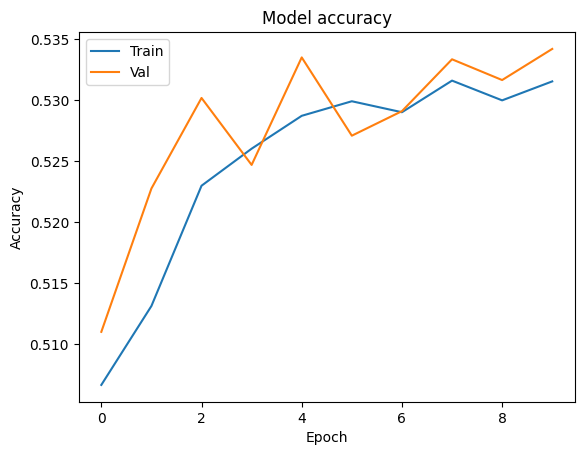

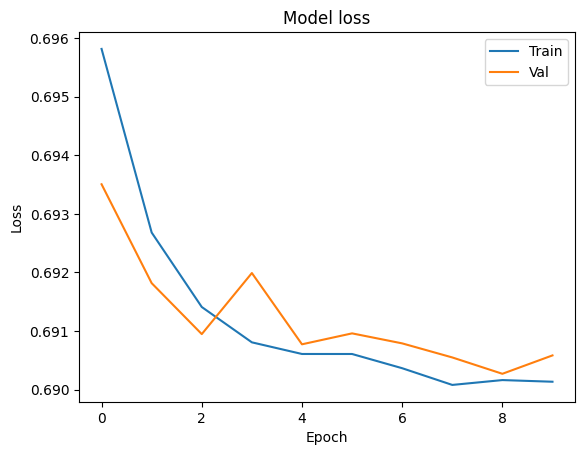

In [17]:

stats.plot_history(deep_emb_hist)

The smaller version of the DeepEmbedding model performed relatively well and kept steadily increasing during training, so we will try to train a version with a few more layers to see if this can improve the performance further.


In [28]:
aug = augmentation.MatchAugmentation(train_filtered_x, train_filtered_y, aug_chance=0.90, batch_size=64, max_replace=2)

deeper_emb_model = DeepEmbedding(n_layers=10, layer_size=5)
deeper_emb_model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

scheduler = create_scheduler(lambda epoch: 0.0001 * 0.90**epoch, lambda epoch: 8*(2**(epoch//5)))
deeper_emb_hist = deeper_emb_model.fit(aug, epochs=30, validation_data=(val_x, val_y), callbacks=[scheduler])

Epoch 1/30
3198/3198 [==============================] - 85s 25ms/step - loss: 0.6946 - accuracy: 0.5080 - val_loss: 0.6934 - val_accuracy: 0.5066 - lr: 1.0000e-04
Epoch 2/30
3198/3198 [==============================] - 80s 25ms/step - loss: 0.6925 - accuracy: 0.5163 - val_loss: 0.6920 - val_accuracy: 0.5255 - lr: 9.0000e-05
Epoch 3/30
3198/3198 [==============================] - 76s 24ms/step - loss: 0.6913 - accuracy: 0.5250 - val_loss: 0.6912 - val_accuracy: 0.5251 - lr: 8.1000e-05
Epoch 4/30
3198/3198 [==============================] - 76s 24ms/step - loss: 0.6908 - accuracy: 0.5275 - val_loss: 0.6906 - val_accuracy: 0.5314 - lr: 7.2900e-05
Epoch 5/30
3198/3198 [==============================] - 76s 24ms/step - loss: 0.6906 - accuracy: 0.5283 - val_loss: 0.6906 - val_accuracy: 0.5313 - lr: 6.5610e-05
Epoch 6/30
3198/3198 [==============================] - 77s 24ms/step - loss: 0.6903 - accuracy: 0.5291 - val_loss: 0.6909 - val_accuracy: 0.5284 - lr: 5.9049e-05
Epoch 7/30
3198/3198 [

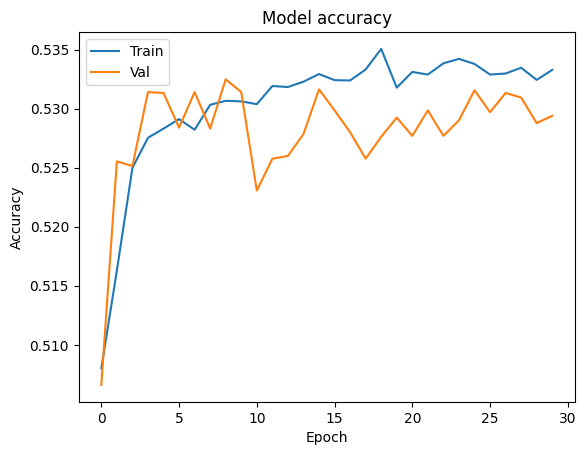

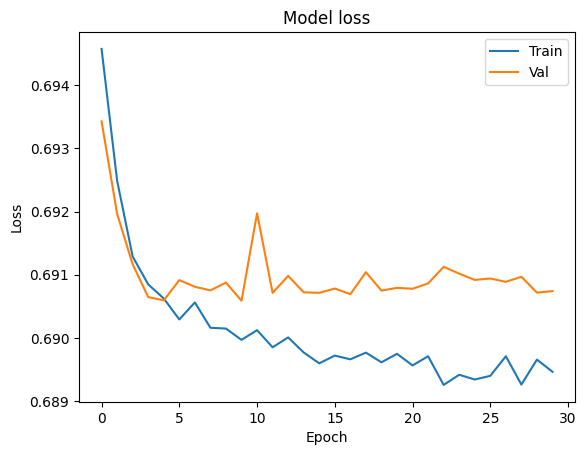

In [29]:
stats.plot_history(deeper_emb_hist)

We've tested a few different hyperparameters like learning rates, batch sizes, epochs, number of layers and layer sizes, but overall the model does not perform better compared to the smaller one and just starts overfitting after more training. We will move on for now and test different architectures that are more specialized to the specific task, instead of just using a bunch of dense layers.

## Convolution Model

This model consists of a set amount of layers that are stacked after another. In contrast to the previous model, this model tries to compare the individual inputs, the 10 different champions, to each other instead of just processing everything at once with dense layers. To do this, we are using a conv1d layer after a simple linear layer to hopefully learn more general relationships.

In addition, this model uses two embedding layers instead of one. As before, the first one is for the champions, but the second one is for the team, which is 0 for when the champion index is 0, 1 for the blue side and 2 for the red side.
These embeddings get added to one tensor and then passed through the layer. The idea behind this is that the relationship between champions depends on if they are on the same or on different teams, and with this technique the model could learn to treat them differently, while still being based on the same champion. The dense models before didn't have this requirement, since every layer was densely connected with the previous one, which means that the order of the embeddings also included the team.


In [32]:
# a model with multiple layers that consist of conv1d, max pool, dense layers and residual connections
class DeepConv(tf.keras.Model):
    def __init__(self, champ_num=170, emb_dim=32, n_layers=3):
        super().__init__()
        player_num = 10
        self.n_layers = n_layers
        self.player_num = player_num
        self.champ_num = champ_num
        self.emb_dim = emb_dim
        self.embedding = tf.keras.layers.Embedding(champ_num, emb_dim, input_length=player_num)
        #self.expand = tf.keras.layers.Dense(emb_dim*player_num, activation=None)
        self.team_embedding = tf.keras.layers.Embedding(3, emb_dim, input_length=player_num)
        self.deep_layers = []
        self.layer_norm = tf.keras.layers.LayerNormalization()
        for i in range(n_layers):
            layer = []
            lname = "_layer_" + str(i)
            tf.keras.layers.Reshape((-1, player_num*emb_dim))
            layer.append(tf.keras.layers.Dense(emb_dim*player_num*player_num, activation=None, name="expand"+lname))
            tf.keras.layers.Reshape((-1, player_num*emb_dim, player_num))
            layer.append(tf.keras.layers.Conv1D(emb_dim, 5, strides=5, padding="same", activation='gelu', name="conv1d"+lname))
            layer.append(tf.keras.layers.MaxPool1D(2, name="maxpool"+lname))
            
            layer.append(tf.keras.layers.Dense(emb_dim, activation='gelu', name="dense"+lname))

            self.deep_layers.append(layer)
            

        #self.maxpool = tf.keras.layers.MaxPool1D(10)
        self.flatten = tf.keras.layers.Flatten()


        self.dense1 = tf.keras.layers.Dense(emb_dim*6, activation='gelu')
        self.dense2 = tf.keras.layers.Dense(emb_dim*3, activation='gelu')
        self.out = tf.keras.layers.Dense(1, activation='sigmoid')





    def call(self, inputs):
        # mask for empty slots
        mask = tf.where(inputs == 0, 0, 1)
        x = self.embedding(inputs)

        # team embedding
        team_vals = [1,1,1,1,1,2,2,2,2,2]
        team_vals = tf.convert_to_tensor(team_vals)
        team_vals = tf.reshape(team_vals, (-1, 10))
        team_vals = team_vals * mask
        team_vals = tf.cast(team_vals, tf.int32)
        team_vals = self.team_embedding(team_vals)

        # add team embedding to champion embedding
        x = x + team_vals

        for layer in self.deep_layers:
            xl = layer[0](x)
            for i in range(1, len(layer)):
                xl = layer[i](xl)

            # residual connection
            x+=xl
            x = self.layer_norm(x)


        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dense2(x)
        x = self.out(x)
        return x

In [33]:
aug = augmentation.MatchAugmentation(train_filtered_x, train_filtered_y, aug_chance=0.90, batch_size=64, max_replace=2)

deep_conv_model = DeepConv()
deep_conv_model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

scheduler = create_scheduler(lambda epoch: 0.0001 * 0.90**epoch, lambda epoch: 8*(2**(epoch//5)))
deeper_conv_hist = deep_conv_model.fit(aug, epochs=30, validation_data=(val_x, val_y), callbacks=[scheduler])

Epoch 1/30
3198/3198 [==============================] - 60s 18ms/step - loss: 0.6938 - accuracy: 0.5073 - val_loss: 0.6931 - val_accuracy: 0.5072 - lr: 1.0000e-04
Epoch 2/30
3198/3198 [==============================] - 58s 18ms/step - loss: 0.6930 - accuracy: 0.5117 - val_loss: 0.6930 - val_accuracy: 0.5074 - lr: 9.0000e-05
Epoch 3/30
3198/3198 [==============================] - 58s 18ms/step - loss: 0.6920 - accuracy: 0.5200 - val_loss: 0.6915 - val_accuracy: 0.5252 - lr: 8.1000e-05
Epoch 4/30
3198/3198 [==============================] - 58s 18ms/step - loss: 0.6914 - accuracy: 0.5251 - val_loss: 0.6919 - val_accuracy: 0.5261 - lr: 7.2900e-05
Epoch 5/30
3198/3198 [==============================] - 58s 18ms/step - loss: 0.6908 - accuracy: 0.5275 - val_loss: 0.6924 - val_accuracy: 0.5214 - lr: 6.5610e-05
Epoch 6/30
3198/3198 [==============================] - 57s 18ms/step - loss: 0.6906 - accuracy: 0.5289 - val_loss: 0.6910 - val_accuracy: 0.5281 - lr: 5.9049e-05
Epoch 7/30
3198/3198 [

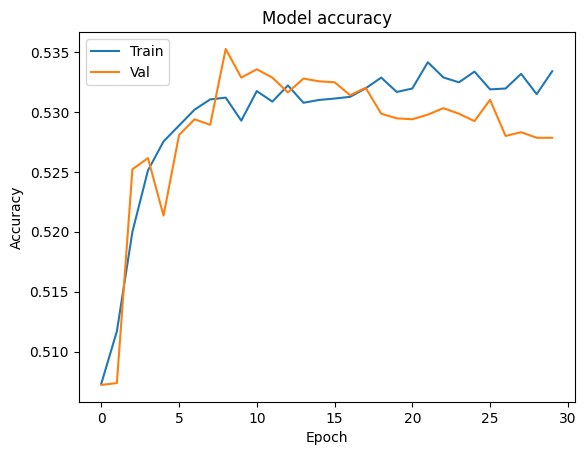

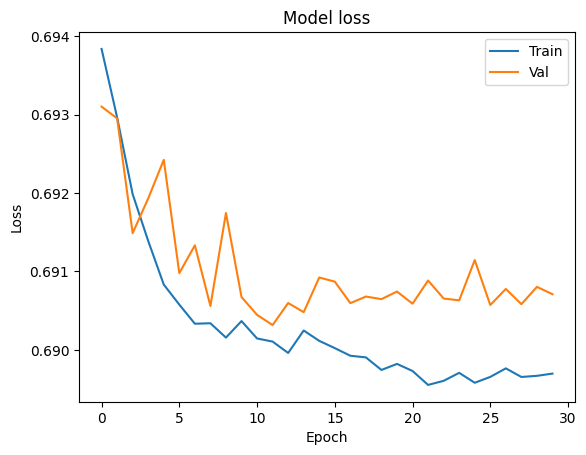

In [35]:
stats.plot_history(deeper_conv_hist)

## Attention Mechanism

Since the goal is to learn the relationship between the 10 champions, similar to how a language model tries to learn the relationship between tokens in a sequence, we will try to create a model that uses multi head attention to predict the outcome of games.

The model will start with champions and team embeddings like the previous model. In a series of attention blocks, we will use masked multi head attention to transform the embedding sequence. The mask is used where the input index is 0, which means that the champion hasn't been selected yet. Inside the attention block we will also apply a residual connection with layer norm to improve the learning performance of deeper models.


In [41]:
# a single transformer block that can have multiple heads
class LoLTransformerBlock(tf.keras.layers.Layer):
    def __init__(self, num_heads, embedding_dim):
        super(LoLTransformerBlock, self).__init__()
        self.num_heads = num_heads
        self.embedding_dim = embedding_dim

        self.flatten = tf.keras.layers.Flatten()

        # multi-head attention
        self.query = tf.keras.layers.Dense(self.embedding_dim*num_heads, input_shape=(self.embedding_dim,), activation=None)
        self.key = tf.keras.layers.Dense(self.embedding_dim*num_heads, input_shape=(self.embedding_dim,), activation=None)
        self.value = tf.keras.layers.Dense(self.embedding_dim*num_heads, input_shape=(self.embedding_dim,), activation=None)

        self.sqrt_d = tf.math.sqrt(tf.cast(self.embedding_dim, tf.float32))


        self.layernorm1 = tf.keras.layers.LayerNormalization()

        self.combineHeads = tf.keras.layers.Dense(self.embedding_dim, activation=None)

        self.nonLin = tf.keras.layers.Dense(self.embedding_dim, input_shape=(self.embedding_dim,), activation='gelu')

    def split_heads(self, x):
        # x.shape = (batch_size, 10, embedding_dim)
        # split into qvk for each head
        q = tf.reshape(self.query(x), (-1, self.num_heads, 10, self.embedding_dim))
        k = tf.reshape(self.key(x), (-1, self.num_heads, 10, self.embedding_dim))
        v = tf.reshape(self.value(x), (-1, self.num_heads, 10, self.embedding_dim))

        return q, k, v
    
    def scaled_dot_product_attention(self, q, k, v, mask=None):
        # perform self attention for each head
        # q, k, v shape = (batch_size, num_heads, 10, embedding_dim)

        # calculate attention weights
        # q shape = (batch_size, num_heads, 10, 1, embedding_dim)
        # k shape = (batch_size, num_heads, 1, 10, embedding_dim)
        attention_weights = tf.matmul(q, k, transpose_b=True) / self.sqrt_d
        # shape = (batch_size, num_heads, 10, 10)

        # apply mask if not None
        if mask != None:
            #mask = mask.astype('float32')
            mask = tf.reshape(mask, (-1, 1, 1, 10))
            attention_weights+= mask  * -1e9

        # softmax
        attention_weights = tf.nn.softmax(attention_weights)
        # shape = (batch_size, num_heads, 10, 10)

        # apply attention weights to values
        # v shape = (batch_size, num_heads, 10, embedding_dim)
        output = tf.matmul(attention_weights, v)
        # shape = (batch_size, num_heads, 10, embedding_dim)
        return output

    def combine_heads(self, x):
        # x.shape = (batch_size, num_heads, 10, embedding_dim)
        # flatten before combination layer
        x = tf.transpose(x, perm=[0,2,1,3])
        # x.shape = (batch_size, 10, num_heads, embedding_dim)
        x = tf.reshape(x, ((-1, 10, self.num_heads*self.embedding_dim)))
        x = self.combineHeads(x)
        # x.shape = (batch_size, 10,embedding_dim)
        return x

    def call(self, x, mask=None):
        # x.shape = (batch_size, 10, embedding_dim)
        x_original = x
        
        # multi-head attention
        q, k, v = self.split_heads(x)
        # q, k, v shape = (batch_size, num_heads, 10, embedding_dim)
        x = self.scaled_dot_product_attention(q, k, v, mask=mask)
        # x shape = (batch_size, num_heads, 10, embedding_dim)
        x = self.combine_heads(x)
        # x.shape = (batch_size, 10, embedding_dim)

        # residual connection
        x = x + x_original
        x = self.layernorm1(x)
        # x.shape = (batch_size, 10, embedding_dim)

        # feed forward
        x = self.nonLin(x)
        # x.shape = (batch_size, 10, embedding_dim)

        # residual connection
        x = x + x_original
        x = self.layernorm1(x)

        return x

# base model consisting of the embeddings, multiple transformer blocks and some dense layers at the end
class LoLTransformer(tf.keras.Model):
    def __init__(self, num_layers=4, num_heads=4, embedding_dim=32, champ_vocab_size=170):
        super(LoLTransformer, self).__init__()

        self.embedding_dim = embedding_dim
        self.champ_vocab_size = champ_vocab_size
        self.num_layers = num_layers
        self.num_heads = num_heads

        # embedding layers
        self.champ_embedding = tf.keras.layers.Embedding(self.champ_vocab_size, self.embedding_dim)
        self.team_embedding = tf.keras.layers.Embedding(2, self.embedding_dim)

        # transformer layers
        self.transformer_layers = [LoLTransformerBlock(self.num_heads, self.embedding_dim) for _ in range(self.num_layers)]

        # output layers
        self.dense = tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(10*self.embedding_dim,))



    def call(self, x):
        # x.shape = (batch_size, 10), where each element is a champion index

        mask = tf.where(x == 0, 1.0, 0.0)

        # get embeddings
        x = self.champ_embedding(x)
        # x.shape = (batch_size, 10, embedding_dim)
        # add team embeddings, 0-4 are team 1, 5-9 are team 2
        t = tf.concat([self.team_embedding(tf.zeros((1,5))), self.team_embedding(tf.ones((1,5)))], axis=1)
        x = x + t
        # x.shape = (batch_size, 10, embedding_dim)
        
        # transformer layers
        for transformer in self.transformer_layers:
            x = transformer(x, mask=mask)
        # x.shape = (batch_size, 10, embedding_dim)

        # output layers
        x = tf.reshape(x, (-1, 10*self.embedding_dim))
        x = self.dense(x)
        # x.shape = (batch_size, 1)
        return x

In [42]:
aug = augmentation.MatchAugmentation(train_filtered_x, train_filtered_y, aug_chance=0.90, batch_size=64, max_replace=2)

lol_transformer = LoLTransformer()
lol_transformer.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

scheduler = create_scheduler(lambda epoch: 0.0001 * 0.90**epoch, lambda epoch: 8*(2**(epoch//5)))
lol_transformer_hist = lol_transformer.fit(aug, epochs=20, validation_data=(val_x, val_y), callbacks=[scheduler])

Epoch 1/30
3198/3198 [==============================] - 56s 17ms/step - loss: 0.6991 - accuracy: 0.5039 - val_loss: 0.6933 - val_accuracy: 0.5101 - lr: 1.0000e-04
Epoch 2/30
3198/3198 [==============================] - 53s 16ms/step - loss: 0.6927 - accuracy: 0.5137 - val_loss: 0.6917 - val_accuracy: 0.5272 - lr: 9.0000e-05
Epoch 3/30
3198/3198 [==============================] - 53s 17ms/step - loss: 0.6913 - accuracy: 0.5234 - val_loss: 0.6908 - val_accuracy: 0.5281 - lr: 8.1000e-05
Epoch 4/30
3198/3198 [==============================] - 53s 17ms/step - loss: 0.6908 - accuracy: 0.5257 - val_loss: 0.6911 - val_accuracy: 0.5241 - lr: 7.2900e-05
Epoch 5/30
3198/3198 [==============================] - 54s 17ms/step - loss: 0.6906 - accuracy: 0.5280 - val_loss: 0.6907 - val_accuracy: 0.5326 - lr: 6.5610e-05
Epoch 6/30
3198/3198 [==============================] - 53s 17ms/step - loss: 0.6904 - accuracy: 0.5295 - val_loss: 0.6906 - val_accuracy: 0.5346 - lr: 5.9049e-05
Epoch 7/30
3198/3198 [

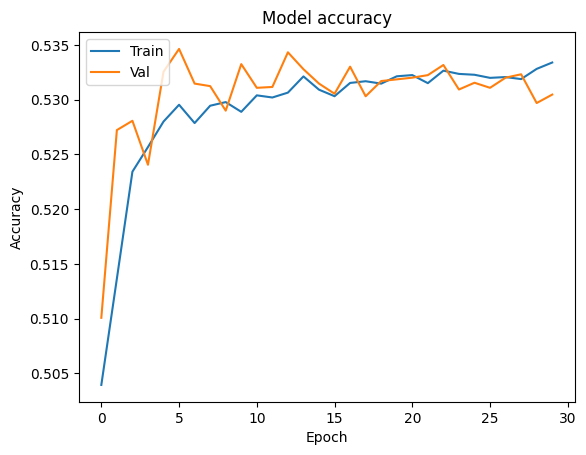

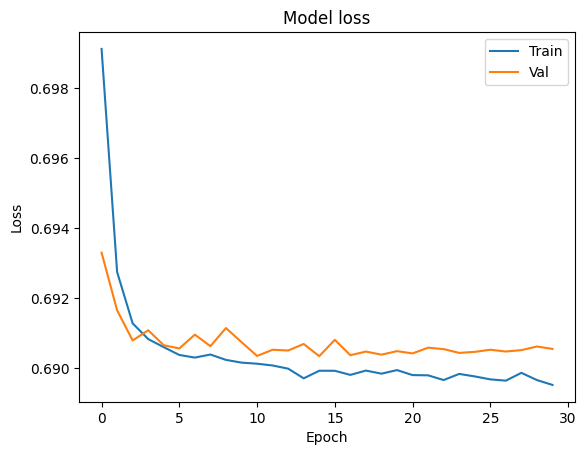

In [43]:
stats.plot_history(lol_transformer_hist)

In [44]:
aug = augmentation.MatchAugmentation(train_filtered_x, train_filtered_y, aug_chance=0.95, batch_size=32, max_replace=2)

lol_transformer_8_8 = LoLTransformer(num_layers=8, num_heads=8)
lol_transformer_8_8.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

scheduler = create_scheduler(lambda epoch: 0.0001 * 0.96**epoch, lambda epoch: 8*(2**(epoch//5)))
lol_transformer_8_8_hist = lol_transformer_8_8.fit(aug, epochs=20, validation_data=(val_x, val_y), callbacks=[scheduler])

Epoch 1/40
6397/6397 [==============================] - 183s 28ms/step - loss: 0.6976 - accuracy: 0.5083 - val_loss: 0.6929 - val_accuracy: 0.5135 - lr: 1.0000e-04
Epoch 2/40
6397/6397 [==============================] - 182s 28ms/step - loss: 0.6923 - accuracy: 0.5197 - val_loss: 0.6921 - val_accuracy: 0.5164 - lr: 9.6000e-05
Epoch 3/40
6397/6397 [==============================] - 179s 28ms/step - loss: 0.6915 - accuracy: 0.5231 - val_loss: 0.6907 - val_accuracy: 0.5262 - lr: 9.2160e-05
Epoch 4/40
6397/6397 [==============================] - 179s 28ms/step - loss: 0.6911 - accuracy: 0.5269 - val_loss: 0.6919 - val_accuracy: 0.5242 - lr: 8.8474e-05
Epoch 5/40
6397/6397 [==============================] - 180s 28ms/step - loss: 0.6907 - accuracy: 0.5281 - val_loss: 0.6911 - val_accuracy: 0.5277 - lr: 8.4935e-05
Epoch 6/40
6397/6397 [==============================] - 181s 28ms/step - loss: 0.6909 - accuracy: 0.5266 - val_loss: 0.6915 - val_accuracy: 0.5250 - lr: 8.1537e-05
Epoch 7/40
6397/

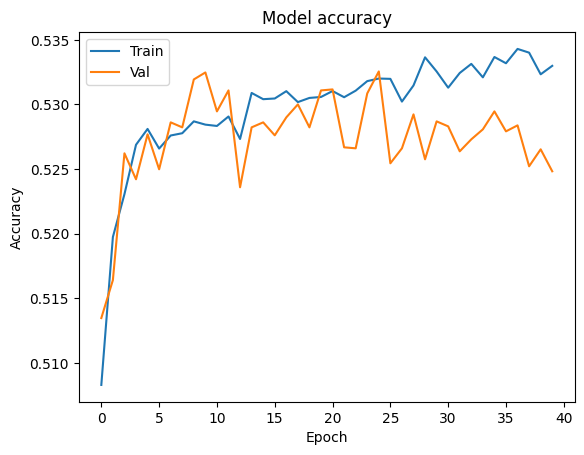

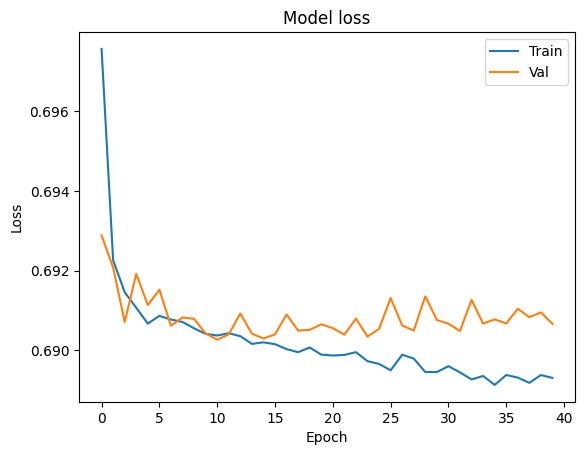

In [45]:
stats.plot_history(lol_transformer_8_8_hist)

### Ensemble
We've explored various hyperparameters, including learning rates, batch sizes, epochs, as well as the number of layers and their sizes. However, the overall performance of the model doesn't significantly improve compared to a smaller one, and it tends to exhibit signs of overfitting with prolonged training. Instead of continuing with hyperparameter tuning, we're now transitioning to testing different architectures that are tailored to the specific task. One such model is the Ensemble Model.

The Ensemble Model embodies a collaborative approach, integrating previous model architectures — Basic Embedding, Deep Embedding, Deep Convolutional, and the LoL Transformer. This models goal is to utilize the unique upsides of each model for improved predictive accuracy.

The model structure involves aggregating predictions from individual models, in hopes of a better accuracy than that of a standalone model.

In [95]:
class EnsembleModel(tf.keras.Model):
    def __init__(self, models):
        super(EnsembleModel, self).__init__()
        self.models = models

    def call(self, inputs):
        predictions = [model(inputs) for model in self.models]
        averaged_predictions = tf.reduce_mean(predictions, axis=0)
        return averaged_predictions

In [97]:
# Create an ensemble model
ens_model = EnsembleModel(models=[basic_embedding, deep_emb_model, deep_conv_model, lol_transformer, lol_transformer_8_8])
ens_model.compile(optimizer=tf.keras.optimizers.Adam(),
                    loss=tf.keras.losses.BinaryCrossentropy(),
                    metrics=['accuracy'])

ens_model.evaluate(test_x, test_y)

405/405 [==============================] - 17s 33ms/step - loss: 0.6896 - accuracy: 0.5333


[0.6895990967750549, 0.5333281755447388]

## Analysis

After training a few different models, we will try to compare them with each other. To do that, we will not only consider the accuracy, but also a few other measurements that could give us a better indication of the performance and usability.

### Confidence

We will calculate the confidence and average confidence over the test data. To do this, we have to define how we are calculating this confidence first. The lowest possible confidence should be at predictions of 0.5 and the highest at 0.0 or 1.0. The confidence values should range from 0 to 1.

There are different ways to create a function for this, but here is a simple example:

```
conf(y_hat) = (2*y_hat - 1)^2
```

### Confident Accuracy

Using the concept of the previously introduced confidence, we can calculate an accuracy value that is reflecting the accuracy for confident values stronger than for less confident values.
Even if our overall accuracy is low, the model could still be useful. For example, if the model predict around 0.5 9 out of 10 times with an accuracy of 50%, but 1 out of 10 times either close to 0 or close to 1 with a high accuracy, those highly confident predictions would be very useful in the games where they apply. This could be that case if only specific champion combinations influence the win chance heavily, while most combinations matter much less.

We can calculate the confident accuracy with the following function:

```
cacc(y_hat, y) = 0.5 + |(y_hat - 0.5)| * 1 if |y_hat - y| < 0.5 else -1
```

With this formula, predictions around 0.5 will always have a confident accuracy of 0.5, no matter the true accuracy. Only high or low predictions will impact the overall confident accuracy.

### Selected Accuracy

We will also calculate the accuracy above some selected confidence thresholds. For example, we will calculate the accuracy for all confidence values above 0.5. This gives us another indication of how good the model performs for specific ranges.


Evaluating  BasicEmb
405/405 [==============================] - 1s 2ms/step - loss: 0.7082 - accuracy: 0.5174
Test accuracy:  0.7081529498100281
Test loss:  0.5174171328544617
Evaluating  AugEmb
405/405 [==============================] - 1s 2ms/step - loss: 0.6898 - accuracy: 0.5313
Test accuracy:  0.6898033618927002
Test loss:  0.5313199758529663
Evaluating  DeepEmb
405/405 [==============================] - 2s 4ms/step - loss: 0.6900 - accuracy: 0.5345
Test accuracy:  0.6900472044944763
Test loss:  0.5344867706298828
Evaluating  DeeperEmb
405/405 [==============================] - 3s 8ms/step - loss: 0.6894 - accuracy: 0.5344
Test accuracy:  0.6893748044967651
Test loss:  0.5344095230102539
Evaluating  DeepConv
405/405 [==============================] - 5s 11ms/step - loss: 0.6898 - accuracy: 0.5289
Test accuracy:  0.6897768378257751
Test loss:  0.5289255976676941
Evaluating  Tranformer
405/405 [==============================] - 3s 8ms/step - loss: 0.6893 - accuracy: 0.5333
Test accu

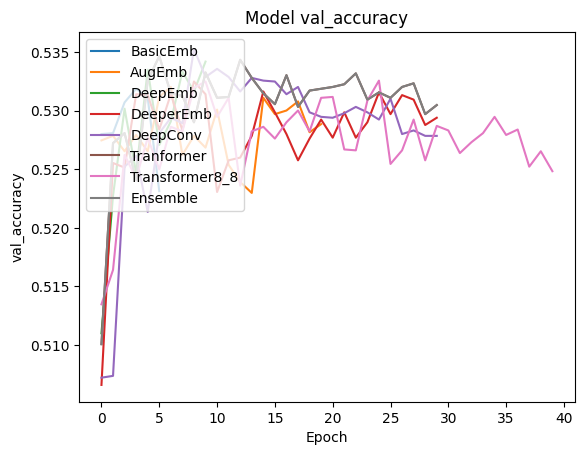

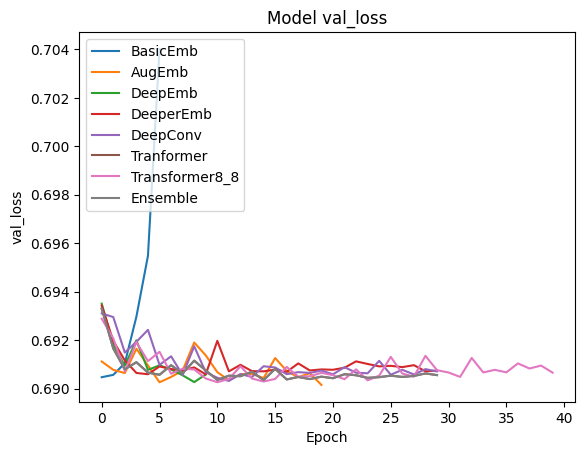

| Model | Test acc | Test loss | Avg Conf | Conf Acc | Conf>0.01 Acc | Conf>0.1 Acc | Conf>0.3 Acc |
| --- | ---: | ---: | ---: | ---: | ---: | ---: | ---: |
| BasicEmb | 0.7082 | 0.5174 | 0.0478 | 0.5055 | 0.5322 | 0.5526 | 0.6058 |
| DeepEmb | 0.6900 | 0.5345 | 0.0129 | 0.5048 | 0.5590 | 0.7069 | 0.5000 |
| AugEmb | 0.6898 | 0.5313 | 0.0063 | 0.5032 | 0.5669 | 1.0000 | 0.5000 |
| DeepConv | 0.6898 | 0.5289 | 0.0057 | 0.5031 | 0.5753 | 0.5000 | 0.5000 |
| Transformer8_8 | 0.6897 | 0.5358 | 0.0096 | 0.5041 | 0.5643 | 0.7436 | 0.5000 |
| Ensemble | 0.6896 | 0.5333 | 0.0102 | 0.5043 | 0.5597 | 0.7692 | 0.5000 |
| DeeperEmb | 0.6894 | 0.5344 | 0.0091 | 0.5042 | 0.5709 | 0.5000 | 0.5000 |
| Tranformer | 0.6893 | 0.5333 | 0.0089 | 0.5041 | 0.5739 | 0.6667 | 0.5000 |



In [98]:
import stats

def confidence(y_hat):
    return tf.pow((2*y_hat -1), 2)


def conf_acc(y_hat, y):
    #y = tf.cast(y, dtype=tf.float32)
    acc_mult = tf.where(tf.abs(y_hat-y)<0.5, 1.0, -1.0)
    return 0.5 + tf.abs(y_hat-0.5) * acc_mult


# calc avg for models
def avg_confidence(model):
    y_hat = model.predict(test_x, batch_size=64, verbose=False)

    c = confidence(y_hat)
    c = tf.reshape(c, (-1,))
    return float(tf.reduce_mean(c))

def avg_conf_acc(model):
    y_hat = model.predict(test_x, batch_size=64, verbose=False)
    y = test_y

    ca = conf_acc(y_hat, y)
    ca = tf.reshape(ca, (-1,))
    return float(tf.reduce_mean(ca))

def create_selected_accuracy(min_conf=0.2):
    def sel_acc(model):
        y_hat = model.predict(test_x, batch_size=64, verbose=False)
        y = test_y

        acc = tf.where(tf.abs(y_hat-y)<0.5, 1, 0).numpy()
        conf = confidence(y_hat).numpy()

        acc = np.reshape(acc, (-1,))
        conf = np.reshape(conf, (-1,))

        acc = acc.tolist()
        conf = conf.tolist()
        conf_acc = []
        for a, c in zip(acc, conf):
            if c >= min_conf:
                conf_acc.append(a)

        if len(conf_acc) == 0:
            return 0.5
        conf_acc = np.array(conf_acc)
        return conf_acc.mean()
    return sel_acc

# comparator from stats
# see stats.py for details
comparator = stats.ModelComparator((test_x, test_y))

# add our measurements
comparator.add_measurement("Avg Conf", avg_confidence)
comparator.add_measurement("Conf Acc", avg_conf_acc)
comparator.add_measurement("Conf>0.01 Acc", create_selected_accuracy(0.01))
comparator.add_measurement("Conf>0.1 Acc", create_selected_accuracy(0.1))
comparator.add_measurement("Conf>0.3 Acc", create_selected_accuracy(0.3))

# TODO: fix bug with trivial model, output batch size is smaller than input?
#comparator.add_model(trivial_model, trivial_hist, "Trivial")
comparator.add_model(basic_embedding, be_hist, "BasicEmb")
comparator.add_model(aug_emb2, aug_hist2, "AugEmb")
comparator.add_model(deep_emb_model, deep_emb_hist, "DeepEmb")
comparator.add_model(deeper_emb_model, deeper_emb_hist, "DeeperEmb")
comparator.add_model(deep_conv_model, deeper_conv_hist, "DeepConv")
comparator.add_model(lol_transformer, lol_transformer_hist, "Tranformer")
comparator.add_model(lol_transformer_8_8, lol_transformer_8_8_hist, "Transformer8_8")
comparator.add_model(ens_model, lol_transformer_hist, "Ensemble") # this model has no history, so for now we are just using another one

comparator.plot_histories()

_ = comparator.print_table()





Table output in markdown

Note:

conf > 0.1 == ~0.65+

conf > 0.01 == 0.55+

| Model | Test loss | Test acc | Avg Conf | Conf Acc | Conf>0.01 Acc | Conf>0.1 Acc | Conf>0.3 Acc |
| --- | ---: | ---: | ---: | ---: | ---: | ---: | ---: |
| BasicEmb | 0.7082 | 0.5174 | 0.0478 | 0.5055 | 0.5322 | 0.5526 | 0.6058 |
| DeepEmb | 0.6900 | 0.5345 | 0.0129 | 0.5048 | 0.5590 | 0.7069 | 0.5000 |
| AugEmb | 0.6898 | 0.5313 | 0.0063 | 0.5032 | 0.5669 | 1.0000 | 0.5000 |
| DeepConv | 0.6898 | 0.5289 | 0.0057 | 0.5031 | 0.5753 | 0.5000 | 0.5000 |
| Transformer8_8 | 0.6897 | 0.5358 | 0.0096 | 0.5041 | 0.5643 | 0.7436 | 0.5000 |
| Ensemble | 0.6896 | 0.5333 | 0.0102 | 0.5043 | 0.5597 | 0.7692 | 0.5000 |
| DeeperEmb | 0.6894 | 0.5344 | 0.0091 | 0.5042 | 0.5709 | 0.5000 | 0.5000 |
| Tranformer | 0.6893 | 0.5333 | 0.0089 | 0.5041 | 0.5739 | 0.6667 | 0.5000 |

The table above shows that the models' performance is very similar in most tests. The accuracy differs only by fractions of a percent. Overall, the bigger Transformer model has the best accuracy, but it is still only barely better that the much simpler Deep Embedding model.

If we include the confidence in our comparison, we can notice that the values are mostly similar, except for the conf. >0.1 accuracy. While the Augmented Embedding model probably only has an accuracy of 100% due to a low size of predictions that fit that criteria to begin with, the bigger transformer model and the ensemble perform the best. They have both an accuracy of around 75% when confident in their predictions, which is quite significant.

Based on these values, the bigger transformer model and the ensemble perform the best overall, but simpler models like the Deep Embedding could also be used as they offer a similar performance.

### Embedding Visualization

The image below shows the embedding layer of some of our models. In theory, similar champions should be closer together, as they should affect the win chance in a similar way. Just by looking at it, it is hard to say if this works. Some champions that are close to each other seem similar, while others make less sense.

It is however interesting that when comparing the embeddings of two different models, some champions are always near the same champions. This at least indicates that the models did learn some relations sucessfully.


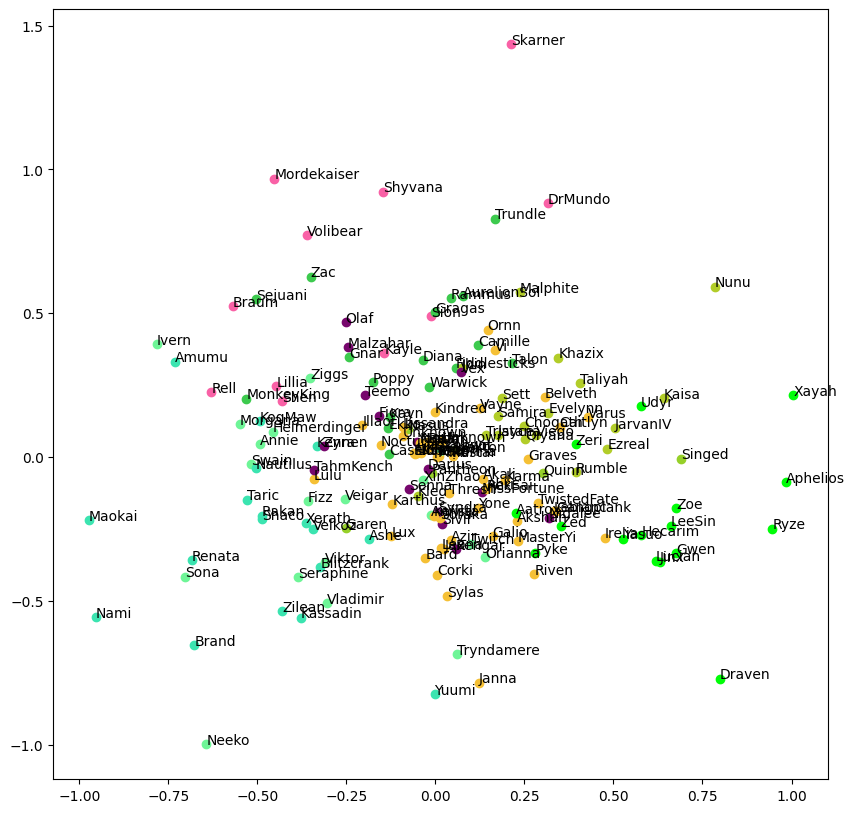

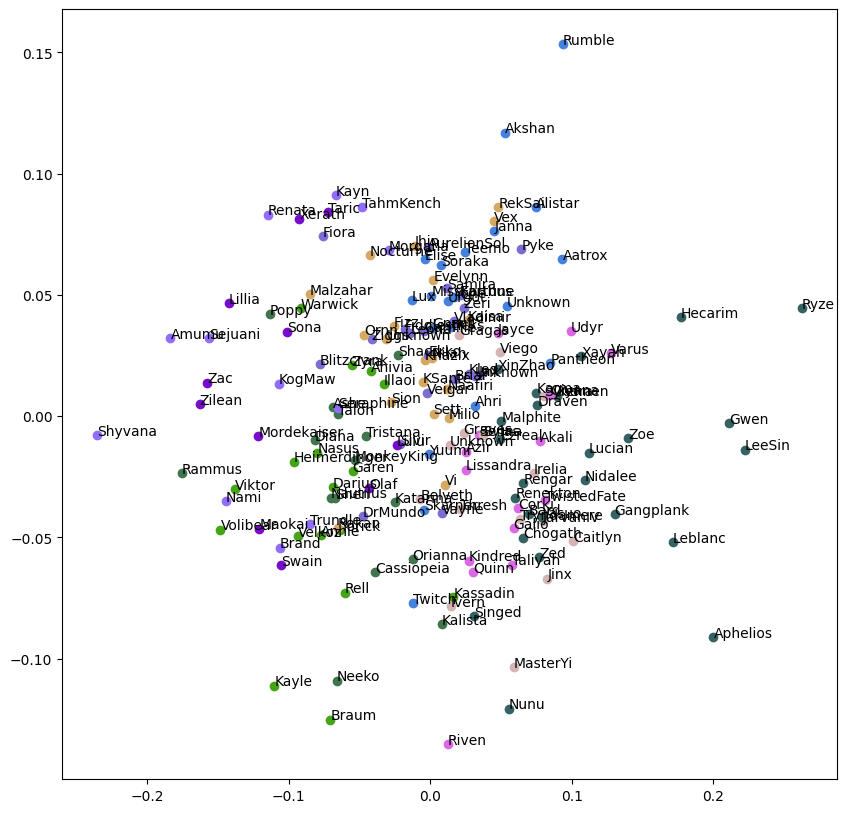

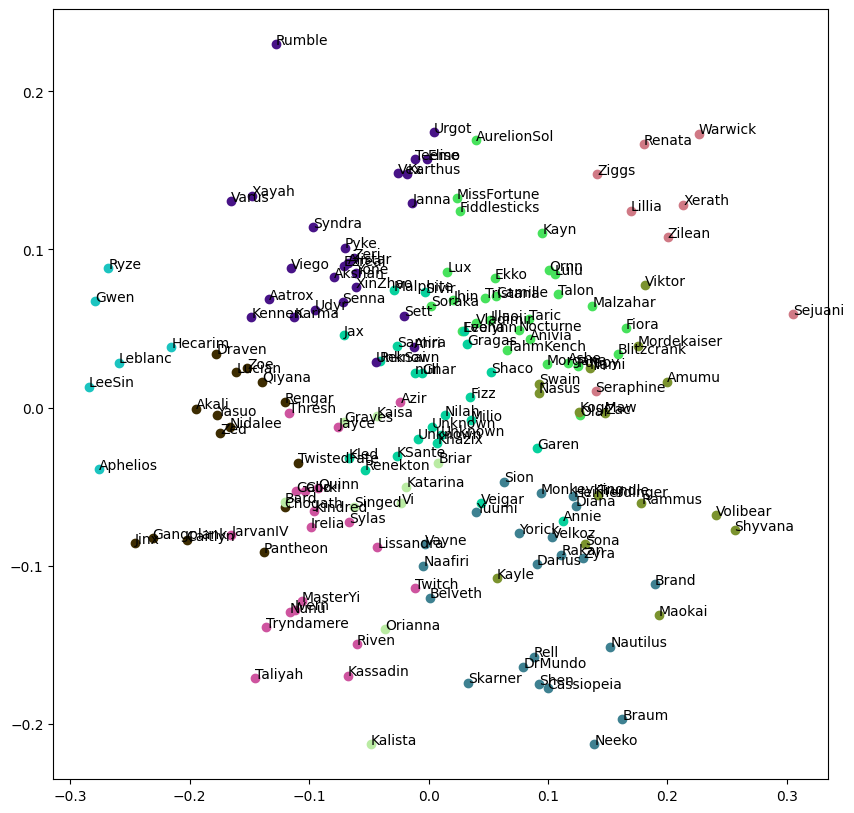

In [87]:
stats.visualize_embeddings(basic_embedding, 170)
stats.visualize_embeddings(deep_conv_model.embedding, 170)
stats.visualize_embeddings(lol_transformer_8_8.champ_embedding, size=170)

## Results

While testing different architectures and hyperparameters, we conclude that it is to some extent possible to predict the outcomes of games based on the selected champions, but not with the highest accuracy due to many other variables that can not be accounted for. The positive part of this is that we know that most games are not decided by the selected champions, but by the events that happen during the game.

Using different architectures with different hyperparameters makes a difference in accuracy and the other measurements, but this difference is relatively small. Filtering the data and using data augmentation was much more important in our tests, since this impacted the accuracy by a lot more.

For most models, the average accuracy stays at around 53%. This is a bit lower that we had hoped, but given the fact that there are so many more factors we're not accounting for, it is not that surprising.

When filtering using the confidence measurement, we can get accuracies of over 70%. Since the average confidence is lower than 0.01 for most of our models, it will be quite rare to find a match where this applies. In the cases where this does happen, our model could be useful by either warning the player or giving him confidence for winning the match.


## Application

In this section we will briefly demonstrate how the trained models could be used. We have created a simple class that has operations. Ideally, this would have a user-friendly UI or take the inputs directly from the client, but for testing purposes this is just a python class with some methods you can call.

### Win Chance Prediction

Just like we did in our tests, this method returns the predicted win chance for a given list of champions. To make it a bit easier to use, we can just input two lists of champions, one for each team, and get the predicted win chance for the blue side. We can also use names directly instead of converting to indices first, which makes this a bit simpler to use.


In [80]:
from lol_prediction import LoLPredictor

predictor = LoLPredictor(lol_transformer_8_8)


#### Example Champion Select

![champ select](data/notebook/img/champ_sel1.png)


In [81]:
blue = ["VelKoz", "Jhin", "Taliyah"]
red = ["Xayah", "Graves", "Malzahar", "LeBlanc"]

# predict blue side win chance
predictor.win_chance(blue, red)

1/1 [==============================] - 0s 32ms/step


0.5423562526702881

### Optimal Champion

By calculating the win chance for all available champions, we can find the champion that gives us the highest win chance.


In [89]:
# predict next best champion (for blue side)
_=predictor.best_pick(blue, red)

5/5 [==============================] - 0s 13ms/step
5 best picks for
['Velkoz', 'Jhin', 'Taliyah', 'null', 'null']
vs
['Xayah', 'Graves', 'Malzahar', 'Leblanc', 'null']
86
Shyvana: 57.66%
19
Warwick: 57.53%
161
Renata: 57.5%
95
Sejuani: 57.24%
32
Amumu: 57.19%


We can also specify a list of champions to check, in case some of them are banned, or the player can only play some of them.


In [83]:
my_champs = ["KhaZix", "LeeSin", "Gragas", "Ivern"]
_=predictor.best_pick(blue, red, my_champs)

1/1 [==============================] - 0s 29ms/step
5 best picks for
['Velkoz', 'Jhin', 'Taliyah', 'null', 'null']
vs
['Xayah', 'Graves', 'Malzahar', 'Leblanc', 'null']
70
Gragas: 54.78%
101
Khazix: 54.73%
145
Ivern: 53.37%
60
LeeSin: 50.88%


In [100]:
def find_optimal_champion():
    print("finding optimal champions")
    # get random sample from test data
    l = test_x.shape[0]
    idx = np.random.randint(0, l)
    sample = test_x[idx]
    # shuffle sample
    blue = sample[:5]
    red = sample[5:]
    # shuffle blue
    np.random.shuffle(blue)
    # shuffle red
    np.random.shuffle(red)
    sample = np.concatenate((blue, red))
    pick_order = [0,3,4,7,8,1,2,5,6,9]
    remove_num = np.random.randint(1, 10)
    remove_num = 9
    mask = np.where(np.array(pick_order) < remove_num, 1, 0)
    match = sample * mask

    all_champs = np.arange(champ_converter.champion_count)

    # duplicate matches
    matches = np.tile(match, champ_converter.champion_count)
    matches = matches.reshape((-1, 10))
    matches[:, remove_num] = all_champs[:]

    results = MODEL.predict(matches)

    # sorts all_champs based on results
    results = results.reshape((-1,))
    indicies = np.argsort(results)
    #indicies = indicies[::-1]
    all_champs = all_champs[indicies]
    results = results[indicies]
    blue = [ champ_converter.get_champion_name_from_index(i) for i in match[:5]]
    red = [ champ_converter.get_champion_name_from_index(i) for i in match[5:]]

    print("5 best picks for")
    print(blue)
    print("vs")
    print(red)
    for i in range(5):
        wr = results[i]
        wr_rounded = round(float(wr) * 100, 2)
        champ = all_champs[i]
        print(champ)
        champ_name = champ_converter.get_champion_name_from_index(int(champ))
        print(f"{champ_name}: {wr_rounded}%")



def menu():
    print("")
    print("1. Choose Model")
    print("2. Find Optimal Champion")
    print("3. Win Chance of Two Champions Head to Head")
    print("0. Exit")

def option1():
    global MODEL
    global HIST
    print("Choose the model used for the predictions")
    print("1. Trivial Model")
    print("2. Basic Embedding")
    print("3. Deep Embedding")
    print("4. Convolution Model")
    print("5. Attention Mechanism")
    print("6. Ensemble Model")
    model_choice = input("Enter your choice (1-6): ")
    print("")

    if model_choice == "1":
        MODEL = trivial_model
        HIST = trivial_hist
        print("Model set to Trivial Model")
    elif model_choice == "2":
        MODEL = base_model
        HIST = base_hist
        print("Model set to Basic Embedding")
    elif model_choice == "3":
        MODEL = deep_emb_model
        HIST = deep_emb_hist
        print("Model set to Deep Embedding")
    elif model_choice == "4":
        MODEL = deep_conv_model
        HIST = deeper_conv_hist
        print("Model set to Convolution Model")
    elif model_choice == "5":
        MODEL = lol_transformer_8_8
        HIST = lol_transformer_8_8_hist
        print("Model set to Attention Mechanism")
    elif model_choice == "6":
        MODEL = ens_model
        HIST = be_hist
        print("Model set to Ensemble Model")
    else:
        print("Invalid choice. Please enter a number between 1 and 6.")
        print("")

def option2():
    find_optimal_champion()
  
def option3():
    champ1 = input("Champ 1: ")
    champ2 = input("Champ 2: ")
    closest1 = champ_converter.get_closest_champion_name(champ1)
    closest2 = champ_converter.get_closest_champion_name(champ2)
    idx1 = champ_converter.champion_names_to_indices[closest1]
    idx2 = champ_converter.champion_names_to_indices[closest2]
    test_in = [idx1]*5 + [idx2]*5
    test_in = np.array(test_in)

    y_pred = MODEL.predict(test_in.reshape(1,10))

    print("Win chance of ", closest1, " vs ", closest2, ": ", y_pred[0][0])

while True:
    menu()
    choice = input("Enter your choice (0-3): ")
    print("")
    if choice == "1":
        option1()
    elif choice == "2":
        option2()
    elif choice == "3":
        option3()
    elif choice == "0":
        print("Exit")
        break
    else:
        print("Invalid choice. Please enter a number between 0 and 3.")


1. Choose Model
2. Find Optimal Champion
3. Win Chance of Two Champions Head to Head
0. Exit

Choose the model used for the predictions
1. Trivial Model
2. Basic Embedding
3. Deep Embedding
4. Ensemble Model

Model set to Deep Embedding

1. Choose Model
2. Find Optimal Champion
3. Win Chance of Two Champions Head to Head
0. Exit

finding optimal champions
6/6 [==============================] - 0s 4ms/step
5 best picks for
['Yasuo', 'Mordekaiser', 'Kayn', 'Kaisa', 'Pyke']
vs
['Akali', 'Fiora', 'Vi', 'Blitzcrank', 'null']
86
Shyvana: 47.47%
59
Brand: 48.05%
10
Kayle: 48.12%
33
Rammus: 48.23%
90
Volibear: 48.35%

1. Choose Model
2. Find Optimal Champion
3. Win Chance of Two Champions Head to Head
0. Exit

1/1 [==============================] - 0s 92ms/step
Win chance of  Ahri  vs  Taliyah :  0.5152499

1. Choose Model
2. Find Optimal Champion
3. Win Chance of Two Champions Head to Head
0. Exit

Exit


## Debugging

There were a few notable problems during development that caused a bit of trouble. We will briefly go over the most important ones.

### Data Augmentation

There were multiple problems that occurred during data augmentation. The problem was that the exact problem was hard to find, since the models trained without throwing any errors. The problems became noticeable when the validation accuracy was either way too high or too low. In some cases the validation accuracy reached 100%, while the training accuracy remained normal at around 53%.

After disabling different parts of the augmentations and a lot of training, we found a problem during batch creating where different batch indices would result in the same games for every batch. With a small batch size, this meant that there were only very few different matches in the validation set, which caused the problems.

Another issue was that we forgot to invert the labels when switching the sides of the teams, which basically resulted in the opposite of the actual result being used for training.

### Input and output shapes

While creating different models, we often had the issue that the shape of the output of a layer wasn't as expected, which of course caused the model to break. The best thing to do in these cases is just to debug the training process and monitor the shape after every layer to locate the source of the error. After that, if the mistake is not obvious, the documentation will probably have an explanation.

### Hyperparameters

While this isn't really a bug like the other cases, it takes a lot of tries to find good or at least working hyperparameters during training. Usually, if the loss starts exploding from the beginning, the learning rate is too high and lowering it by one or more magnitudes should help. In some cases the models just kept predicting the average win rate, without improving over several epochs. While there could be multiple reasons for this, one of them could be underfitting. To solve this, you can try to increase the model complexity. In other cases the reason for this was the loss function. Switching from MSE to Binary Crossentropy fixed this issue.


## Contribution

Ben

-   proposal
-   research
-   different model architectures
-   data augmentation
-   data cleaning
-   visualization
-   documentation

Otso
- proposal
- research
- ensemble
- documentation
- console
- champ win rates

## References

https://developer.riotgames.com/docs/lol

https://www.kaggle.com/datasets/junhachoi/all-ranked-solo-games-on-kr-server-24-hours

https://www.kaggle.com/datasets/datasnaek/league-of-legends

https://minihat.github.io/LoL-Match-Prediction/

https://github.com/DavidMatthewFraser/Predict_LeagueOfLegends_Games

https://www.loldodgetool.com/

https://www.kaggle.com/code/gulsahdemiryurek/let-s-predict-league-of-legends-match-score

https://machinelearningmastery.com/how-to-implement-multi-head-attention-from-scratch-in-tensorflow-and-keras/
